# Import library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Analysis

In [2]:
coursera = pd.read_csv("coursera_cleaned.csv")

In [3]:
duplicated = pd.read_csv("duplicated.csv")

In [4]:
# Por lo detectado en la limpieza, tenemos cursos en los que se utilizan dos skills.

In [5]:
coursera.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
coursera.head(3)

,course,rating,students,level,university,skills
0,Learn SQL Basics for Data Science,4.6,400.0,Beginner,"University of California, Davis",MySQL
1,Excel to MySQL: Analytic Techniques for Business,4.6,660.0,Beginner,Duke University,MySQL
2,Introduction to Structured Query Language (SQL),4.8,140.0,Intermediate,University of Michigan,MySQL


In [7]:
coursera.shape

(3140, 6)

In [8]:
coursera.skills.unique()

array(['MySQL', 'MongoDB', 'Tableau', 'Python', 'Machine Learning',
       'Java'], dtype=object)

### Statistical description  and correlation of rating and students columns. 

In [9]:
# To have an idea about mean, min and max values of "rating" and "number of students" values. 
# This is just as a reminder; students are placed in thousands.

In [10]:
coursera.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,2444.0,4.552660,0.293770,2.3,4.5,4.6,4.7,5.0
students,2030.0,85.428128,259.281633,1.5,4.9,16.0,56.0,4700.0


In [11]:
# Check correlation between rating and number of students

<AxesSubplot:>

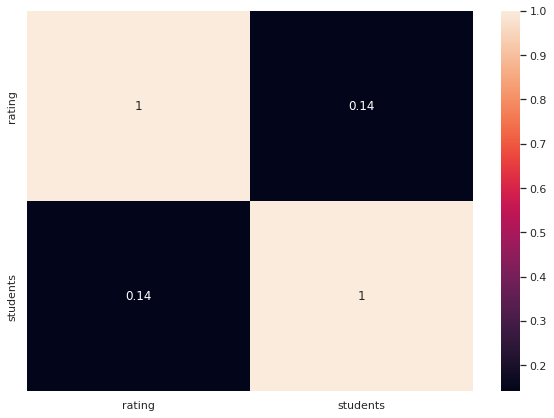

In [12]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (10.,7.)})
sns.set_style("whitegrid")
corrMatrix = coursera.corr()
sns.heatmap(corrMatrix, annot=True)

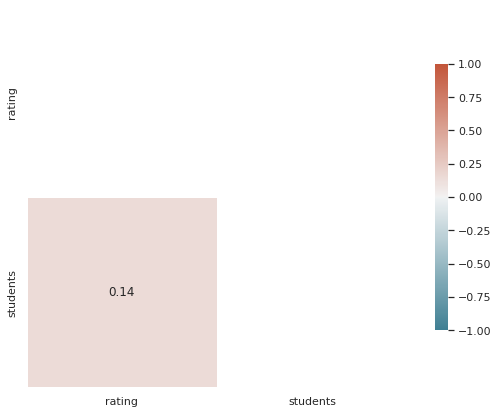

In [13]:
mascara = np.triu(np.ones_like(coursera.corr(), dtype=bool)) # generamos la máscara para la triangular superior
color_map = sns.diverging_palette(220, 20, as_cmap=True) # Paleta de colores
sns.heatmap(coursera.corr(),  
            mask = mascara,
            cmap=color_map,
            square=True, #que los datos se vean como cuadrados
            linewidth=0.5, #ancho de línea
            vmax=1,
            vmin=-1,
            cbar_kws={"shrink": .7
                     },# barra lateral
            annot=True
);

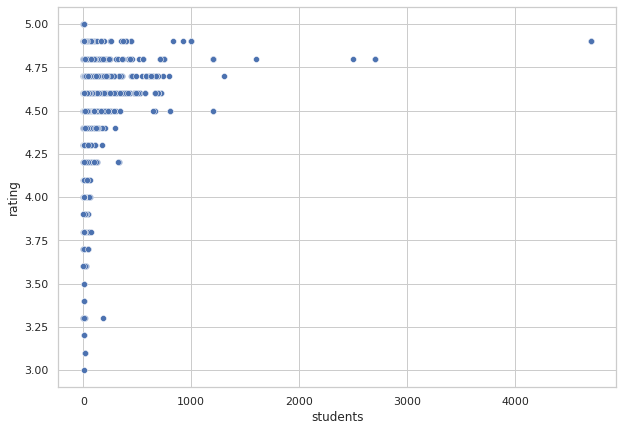

In [14]:
fig, axs = plt.subplots(figsize=(10,7))
sns.scatterplot(x="students", y="rating", data=coursera);

In [15]:
# Apparently there is a weak correlation between rating and number of students. However, from above graphic, we could 
# confirm that for great number of students, rating value is high.

### Level columns.

In [16]:
# Number of courses per level.

In [17]:
coursera.level.value_counts()

Intermediate    1427
Beginner        1198
Mixed            326
Advanced         145
Name: level, dtype: int64

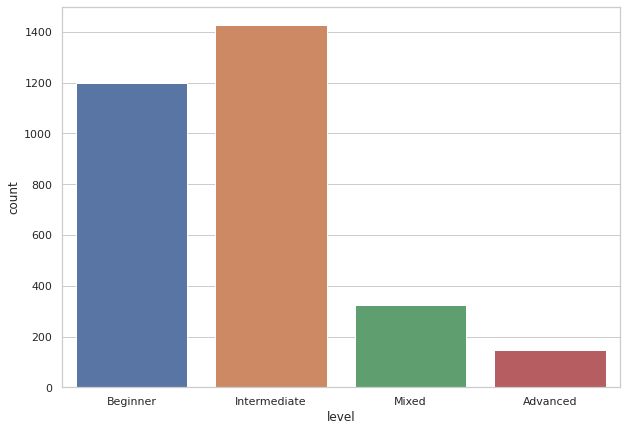

In [18]:
sns.countplot(x=coursera.level);

In [19]:
# Most popular courses are "Intermediate" and "Beginner" for this type of courses.

### University

In [20]:
# Universities and number of courses.

In [21]:
university = coursera.university.value_counts()

In [22]:
len(university)

185

In [23]:
# We have 134 universties/education centers for these courses.

In [24]:
university[0:10]

Coursera Project Network                      909
Google Cloud                                  289
IBM                                           177
DeepLearning.AI                               122
University of Michigan                        121
LearnQuest                                     67
Johns Hopkins University                       61
Duke University                                53
Microsoft                                      48
University of Illinois at Urbana-Champaign     46
Name: university, dtype: int64

In [25]:
# Top ten universities.

uni = university[0:10]

In [26]:
uni

Coursera Project Network                      909
Google Cloud                                  289
IBM                                           177
DeepLearning.AI                               122
University of Michigan                        121
LearnQuest                                     67
Johns Hopkins University                       61
Duke University                                53
Microsoft                                      48
University of Illinois at Urbana-Champaign     46
Name: university, dtype: int64

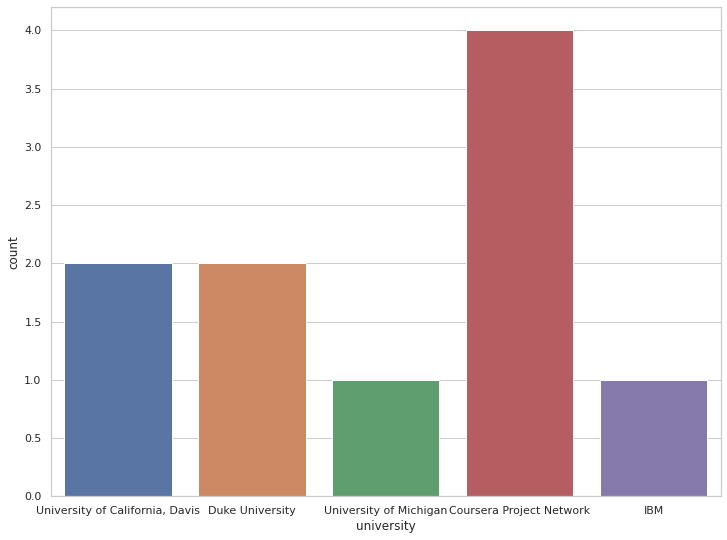

In [27]:
fig, axs = plt.subplots(figsize=(12,9))
sns.countplot(x=coursera.university[0:10]);

In [118]:
univ = pd.DataFrame(uni, columns=['university'])
univ = uni.reset_index()
univ.rename(columns={'index':'university',
                                   'university':'num_skills'}, inplace=True)

In [119]:
univ

,university,num_skills
0,Coursera Project Network,909
1,Google Cloud,289
2,IBM,177
3,DeepLearning.AI,122
4,University of Michigan,121
5,LearnQuest,67
6,Johns Hopkins University,61
7,Duke University,53
8,Microsoft,48
9,University of Illinois at Urbana-Champaign,46


In [120]:
uni.to_csv("visualization/uni.csv", index = False)

### Skills column

In [47]:
coursera.skills.value_counts()

Machine Learning    1000
Java                1000
Python               870
MongoDB              140
Tableau               70
MySQL                 60
Name: skills, dtype: int64

In [48]:
# There is a huge amount of courses to improve skills in subjects related to Python, Java and Machine Learning.

### Skills & number of students

In [49]:
# Create dataframes per skills
Mysql = coursera[(coursera.skills=="MySQL")]
Mongo = coursera[(coursera.skills=='MongoDB')]
Tableau = coursera[(coursera.skills=='Tableau')]
Python = coursera[(coursera.skills=='Python')]
ML = coursera[(coursera.skills=='Machine Learning')]
java = coursera[(coursera.skills=='Java')]

In [50]:
# In cells below, I have summed the number of students.

MySQL

In [51]:
students_mysql = Mysql.students.sum()
students_mysql

2941.5

Mongo

In [52]:
students_mongo = Mongo.students.sum()
students_mongo

4606.4

Tableau

In [53]:
students_tableau = Tableau.students.sum()
students_tableau

3206.3

Python

In [54]:
students_python = round(Python.students.sum(), 1)
students_python

45535.4

Machine Learning

In [55]:
students_ml = round(ML.students.sum(), 1)
students_ml

49227.5

Java

In [56]:
students_java = round(java.students.sum(),1)
students_java

67902.0

In [57]:
# Create a dataframe for later visualization.

In [58]:
students_skills = pd.DataFrame()
students_skills["skills"]=["mysql", "mongo", "tableau", "python", 'machine_learning', "java"]
students_skills["students"]=[students_mysql, students_mongo, students_tableau, students_python, students_ml, students_java]
students_skills


,skills,students
0,mysql,2941.5
1,mongo,4606.4
2,tableau,3206.3
3,python,45535.4
4,machine_learning,49227.5
5,java,67902.0


In [59]:
students_skills.to_csv("visualization/students_skills.csv", index = False)

### Skills & University

In [52]:
# Create a dataframe of universities per skils to be visuaized.

MySQL

In [93]:
university_mysql = Mysql.university.value_counts()
uni_mysql = pd.DataFrame(university_mysql, columns=['university'])
uni_mysql = uni_mysql.reset_index()
uni_mysql.rename(columns={'index':'university',
                                   'university':'num_skills'}, inplace=True)
uni_mysql["skills"] = "MySQL"
uni_mysql.head()

,university,num_skills,skills
0,Coursera Project Network,36,MySQL
1,Duke University,4,MySQL
2,Google Cloud,4,MySQL
3,University of Michigan,3,MySQL
4,University of Colorado System,3,MySQL


In [61]:
uni_mysql.to_csv("visualization/uni_mysql.csv", index = False)

Mongo

In [94]:
university_mongo = Mongo.university.value_counts()
uni_mongo = pd.DataFrame(university_mongo, columns=['university'])
uni_mongo = uni_mongo.reset_index()
uni_mongo.rename(columns={'index':'university',
                                   'university':'num_skills'}, inplace=True)
uni_mongo["skills"] = "MongoDB"
uni_mongo.head()

,university,num_skills,skills
0,Coursera Project Network,19,MongoDB
1,Fundação Instituto de Administração,9,MongoDB
2,University of Michigan,9,MongoDB
3,University of Colorado Boulder,7,MongoDB
4,University of Washington,6,MongoDB


In [63]:
uni_mongo.to_csv("visualization/uni_mongo.csv", index = False)

Tableau

In [95]:
university_tableau = Tableau.university.value_counts()
uni_tableau = pd.DataFrame(university_tableau, columns=['university'])
uni_tableau = uni_tableau.reset_index()
uni_tableau.rename(columns={'index':'university',
                                   'university':'num_skills'}, inplace=True)
uni_tableau["skills"] = "Tableau"
uni_tableau.head()

,university,num_skills,skills
0,Coursera Project Network,30,Tableau
1,Google,7,Tableau
2,"University of California, Davis",6,Tableau
3,Università di Napoli Federico II,4,Tableau
4,Duke University,3,Tableau


In [65]:
uni_tableau.to_csv("visualization/uni_tableau.csv", index = False)

Python

In [96]:
university_python = Python.university.value_counts()
uni_python = pd.DataFrame(university_python, columns=['university'])
uni_python = uni_python.reset_index()
uni_python.rename(columns={'index':'university',
                                   'university':'num_skills'}, inplace=True)
uni_python["skills"] = "Python"
uni_python.head()

,university,num_skills,skills
0,Coursera Project Network,350,Python
1,IBM,91,Python
2,University of Michigan,55,Python
3,Google Cloud,42,Python
4,DeepLearning.AI,31,Python


In [67]:
uni_python.to_csv("visualization/uni_python.csv", index = False)

Machine Learning

In [97]:
university_ml = ML.university.value_counts()
uni_ml = pd.DataFrame(university_ml, columns=['university'])
uni_ml = uni_ml.reset_index()
uni_ml.rename(columns={'index':'university',
                                   'university':'num_skills'}, inplace=True)
uni_ml.head()

,university,num_skills,skills
0,Coursera Project Network,236,Machine Learning
1,Google Cloud,106,Machine Learning
2,IBM,63,Machine Learning
3,DeepLearning.AI,53,Machine Learning
4,Microsoft,37,Machine Learning


In [69]:
uni_ml.to_csv("visualization/uni_ml.csv", index = False)

Java

In [103]:
university_java = java.university.value_counts()
uni_java = pd.DataFrame(university_java, columns=['university'])
uni_java = uni_java.reset_index()
uni_java.rename(columns={'index':'university',
                                   'university':'num_skills'}, inplace=True)
uni_java.head()

,university,num_skills,skills
0,Coursera Project Network,238,Java
1,Google Cloud,132,Java
2,DeepLearning.AI,38,Java
3,University of Michigan,32,Java
4,LearnQuest,27,Java


In [72]:
uni_java.to_csv("visualization/uni_java.csv", index = False)

In [106]:
uni_skills = pd.concat([uni_mysql, uni_mongo, uni_tableau, uni_python, uni_ml, uni_java], axis=0)

In [107]:
uni_skills

,university,num_skills,skills
0,Coursera Project Network,36,MySQL
1,Duke University,4,MySQL
2,Google Cloud,4,MySQL
3,University of Michigan,3,MySQL
4,University of Colorado System,3,MySQL
...,...,...,...
129,University of Pittsburgh,1,Java
130,Università Bocconi,1,Java
131,Icahn School of Medicine at Mount Sinai,1,Java
132,Eindhoven University of Technology,1,Java


In [108]:
uni_skills.to_csv("visualization/uni_skills.csv", index = False)

### Skills & Level

In [65]:
# Create a dataframe of levels per skils to be visuaized.

MySQL

In [109]:
level_mysql = Mysql.level.value_counts()
lev_mysql = pd.DataFrame(level_mysql, columns=['level'])
lev_mysql = level_mysql.reset_index()
lev_mysql.rename(columns={'index':'level',
                                   'level':'num_skills'}, inplace=True)
lev_mysql["skills"] ="MySQL"
lev_mysql.head()

,level,num_skills,skills
0,Intermediate,29,MySQL
1,Beginner,26,MySQL
2,Mixed,4,MySQL
3,Advanced,1,MySQL


In [75]:
lev_mysql.to_csv("visualization/lev_mysql.csv", index=False)

Mongo

In [110]:
level_mongo = Mongo.level.value_counts()
lev_mongo = pd.DataFrame(level_mongo, columns=['level'])
lev_mongo = level_mongo.reset_index()
lev_mongo.rename(columns={'index':'level',
                                   'level':'num_skills'}, inplace=True)
lev_mongo["skills"] ="MongoDB"
lev_mongo.head()

,level,num_skills,skills
0,Beginner,61,MongoDB
1,Intermediate,48,MongoDB
2,Mixed,27,MongoDB
3,Advanced,1,MongoDB


In [77]:
lev_mongo.to_csv("visualization/lev_mongo.csv", index = False)

Tableau

In [111]:
level_tableau = Tableau.level.value_counts()
lev_tableau = pd.DataFrame(level_tableau, columns=['level'])
lev_tableau = level_tableau.reset_index()
lev_tableau.rename(columns={'index':'level',
                                   'level':'num_skills'}, inplace=True)
lev_tableau["skills"] ="Tableau"
lev_tableau.head()

,level,num_skills,skills
0,Beginner,39,Tableau
1,Intermediate,24,Tableau
2,Mixed,6,Tableau
3,Advanced,1,Tableau


In [79]:
lev_tableau.to_csv("visualization/lev_tableau.csv", index = False)

Python

In [112]:
level_python = Python.level.value_counts()
lev_python = pd.DataFrame(level_python, columns=['level'])
lev_python = level_python.reset_index()
lev_python.rename(columns={'index':'level',
                                   'level':'num_skills'}, inplace=True)
lev_python["skills"] ="Python"
lev_python.head()

,level,num_skills,skills
0,Intermediate,436,Python
1,Beginner,302,Python
2,Mixed,70,Python
3,Advanced,50,Python


In [81]:
lev_python.to_csv("visualization/lev_python.csv", index = False)

Machine Learning

In [113]:
level_ml = ML.level.value_counts()
lev_ml = pd.DataFrame(level_ml, columns=['level'])
lev_ml = level_ml.reset_index()
lev_ml.rename(columns={'index':'level',
                                   'level':'num_skills'}, inplace=True)
lev_ml["skills"] ="Machine Learning"
lev_ml.head()

,level,num_skills,skills
0,Intermediate,472,Machine Learning
1,Beginner,351,Machine Learning
2,Mixed,83,Machine Learning
3,Advanced,72,Machine Learning


In [83]:
lev_ml.to_csv("visualization/lev_ml.csv", index = False)

Java

In [114]:
level_java = java.level.value_counts()
lev_java = pd.DataFrame(level_java, columns=['level'])
lev_java = level_java.reset_index()
lev_java.rename(columns={'index':'level',
                                   'level':'num_skills'}, inplace=True)
lev_java["skills"] ="Java"
lev_java.head()

,level,num_skills,skills
0,Beginner,419,Java
1,Intermediate,418,Java
2,Mixed,136,Java
3,Advanced,20,Java


In [85]:
lev_java.to_csv("visualization/lev_java.csv", index = False)

In [115]:
lev_skills = pd.concat([lev_mysql, lev_mongo, lev_tableau, lev_python, lev_ml, lev_java], axis=0)

In [116]:
lev_skills.to_csv("visualization/lev_skills.csv", index = False)

### Level & number of students

In [78]:
# Number of students per level.

In [86]:
Beginner = coursera[(coursera.level=="Beginner")]
Intermediate = coursera[(coursera.level=="Intermediate")]
Mixed = coursera[(coursera.level=="Mixed")]
Advanced = coursera[(coursera.level=="Advanced")]

Beginner

In [87]:
students_beginner = round(Beginner.students.sum(), 1)
students_beginner

75043.0

Intermediate

In [88]:
students_intermediate = round(Intermediate.students.sum(), 1)
students_intermediate

54250.0

Mixed

In [89]:
students_mixed = round(Mixed.students.sum(), 1)
students_mixed

41118.2

Advanced

In [90]:
students_advanced = round(Advanced.students.sum(), 1)
students_advanced

3007.9

In [84]:
# Create dataframe with levels and number of students to be visualized.

In [91]:
students_level = pd.DataFrame()
students_level["level"]=["Beginner", "Intermediate", "Mixed", "Advanced"]
students_level["students"]=[students_beginner, students_intermediate, students_mixed, students_advanced]
students_level

,level,students
0,Beginner,75043.0
1,Intermediate,54250.0
2,Mixed,41118.2
3,Advanced,3007.9


In [92]:
students_level.to_csv("visualization/students_level.csv", index = False)